In [101]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import pandas as pd
import numpy as np

Obesity is a great challenge for health worldwide, which cause various health disease and reduce life quality. With the help of this data set we aims to estimate the obesity level in individuals based on their physical activities, eating habits, family history on overweight, etc. We will use various methods on the dataset gathered from public online survey to prevent and reduce the obesity level.
the target of this dataset is 'NObeyesdad'.

Here's a description of each column in the dataset:

1. **Age**: The age of the individual.
2. **Gender**: The gender of the individual (e.g., Male, Female).
3. **Height**: The height of the individual in meters.
4. **Weight**: The weight of the individual in kilograms.
5. **CALC**: Unknown column. You might need to check the data source or documentation to understand what this column represents.
6. **FAVC**: Whether the individual frequently consumes high caloric food (e.g., yes, no).
7. **FCVC**: Frequency of consumption of vegetables (numeric scale).
8. **NCP**: Number of main meals per day (numeric scale).
9. **SCC**: Squamous cell carcinoma
10. **SMOKE**: Whether the individual smokes (e.g., yes, no).
11. **CH2O**: Consumption of water daily (numeric scale).
12. **family_history_with_overweight**: Whether the individual has a family history of overweight (e.g., yes, no).
13. **FAF**: Physical activity frequency (numeric scale).
14. **TUE**: Time using technology devices (numeric scale).
15. **CAEC**: Unknown column. You might need to check the data source or documentation to understand what this column represents.
16. **MTRANS**: Mode of transportation (e.g., Public Transportation, Walking).
17. **NObeyesdad**: Obesity level of the individual (e.g., Normal_Weight, Overweight_Level_I).

Some columns have numeric values, some are categorical, and others seem to be ordinal.


In [138]:
data = pd.read_csv("/content/ObesityDataSet_raw_and_data_sinthetic - ObesityDataSet_raw_and_data_sinthetic.csv")
data.head(10)

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21.0,Female,1.62,64.0,no,no,2.0,3.0,no,no,2.0,yes,0.0,1.0,Sometimes,Public_Transportation,Normal_Weight
1,21.0,Female,1.52,56.0,Sometimes,no,3.0,3.0,yes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,23.0,Male,1.80,77.0,Frequently,no,2.0,3.0,no,no,2.0,yes,2.0,1.0,Sometimes,Public_Transportation,Normal_Weight
3,27.0,Male,1.80,87.0,Frequently,no,3.0,3.0,no,no,2.0,no,2.0,0.0,Sometimes,Walking,Overweight_Level_I
4,22.0,Male,1.78,89.8,Sometimes,no,2.0,1.0,no,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II
5,29.0,Male,1.62,53.0,Sometimes,yes,2.0,3.0,no,no,2.0,no,0.0,0.0,Sometimes,Automobile,Normal_Weight
6,23.0,Female,1.50,55.0,Sometimes,yes,3.0,3.0,no,no,2.0,yes,1.0,0.0,Sometimes,Motorbike,Normal_Weight
7,22.0,Male,1.64,53.0,Sometimes,no,2.0,3.0,no,no,2.0,no,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
8,24.0,Male,1.78,64.0,Frequently,yes,3.0,3.0,no,no,2.0,yes,1.0,1.0,Sometimes,Public_Transportation,Normal_Weight
9,22.0,Male,1.72,68.0,no,yes,2.0,3.0,no,no,2.0,yes,1.0,1.0,Sometimes,Public_Transportation,Normal_Weight


The following columns could be considered ordinal:


In [139]:
print(data['NObeyesdad'].nunique())
data['NObeyesdad'].unique()

7


array(['Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II',
       'Obesity_Type_I', 'Insufficient_Weight', 'Obesity_Type_II',
       'Obesity_Type_III'], dtype=object)

In [ ]:
print(data['CALC'].nunique())
data['CALC'].unique()

In [104]:
print(data['CAEC'].nunique())
data['CAEC'].unique()

4


array(['Sometimes', 'Frequently', 'Always', 'no'], dtype=object)

## **Exploratory Data Analysis**

In [105]:
data.shape

(2111, 17)

In [106]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             2111 non-null   float64
 1   Gender                          2111 non-null   object 
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   CALC                            2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   SCC                             2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  family_history_with_overweight  2111 non-null   object 
 12  FAF                             21

In [107]:
data.columns

Index(['Age', 'Gender', 'Height', 'Weight', 'CALC', 'FAVC', 'FCVC', 'NCP',
       'SCC', 'SMOKE', 'CH2O', 'family_history_with_overweight', 'FAF', 'TUE',
       'CAEC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

In [108]:
data.isna().sum()

Age                               0
Gender                            0
Height                            0
Weight                            0
CALC                              0
FAVC                              0
FCVC                              0
NCP                               0
SCC                               0
SMOKE                             0
CH2O                              0
family_history_with_overweight    0
FAF                               0
TUE                               0
CAEC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [109]:
data.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [110]:
data.duplicated().sum()

24

In [111]:
data=data.drop_duplicates()

In [112]:
data.shape

(2087, 17)

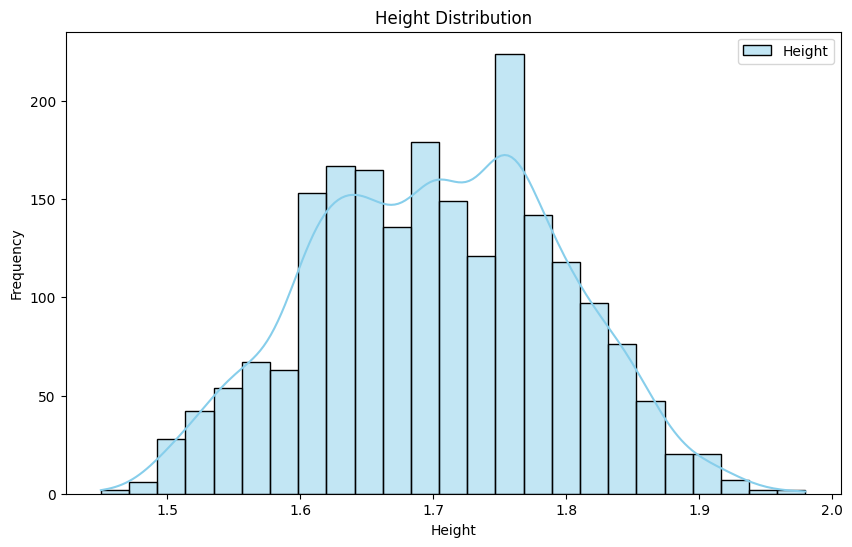

In [113]:
# Height Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='Height', color='skyblue', kde=True, label='Height')
plt.title('Height Distribution')
plt.xlabel('Height')
plt.ylabel('Frequency')
plt.legend()
plt.show()



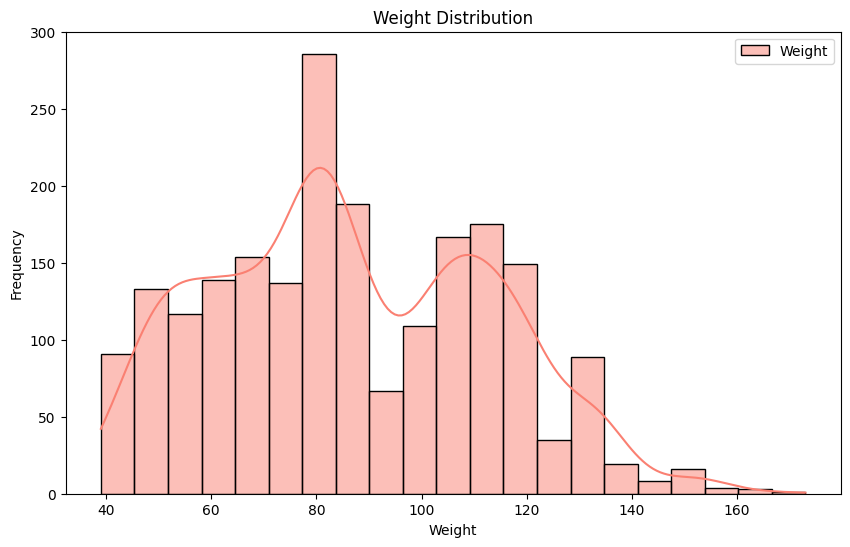

In [114]:
# Weight Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='Weight', color='salmon', kde=True, label='Weight')
plt.title('Weight Distribution')
plt.xlabel('Weight')
plt.ylabel('Frequency')
plt.legend()
plt.show()

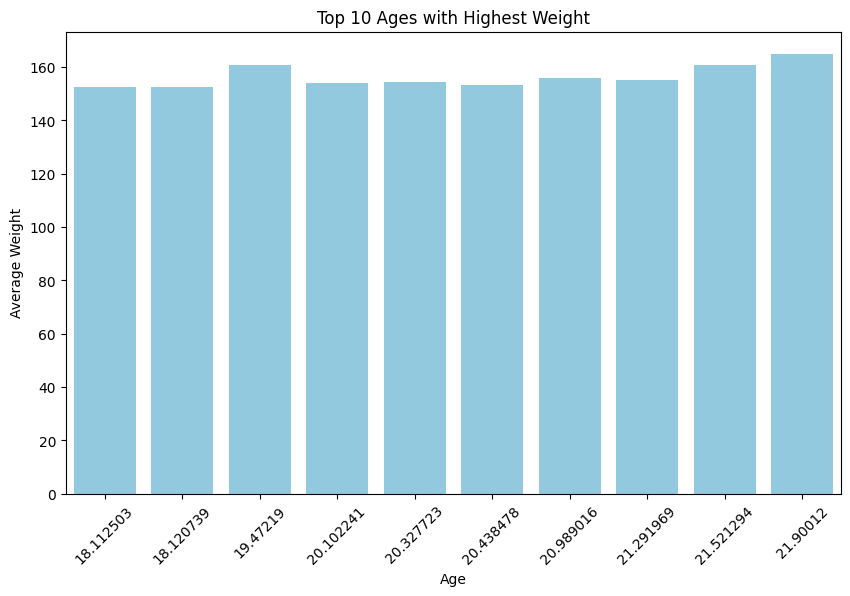

In [115]:
# Top 10 Ages with Highest Weight
top_10_ages = data.groupby('Age')['Weight'].mean().nlargest(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_ages.index, y=top_10_ages.values, color='skyblue')
plt.title('Top 10 Ages with Highest Weight')
plt.xlabel('Age')
plt.ylabel('Average Weight')
plt.xticks(rotation=45)
plt.show()


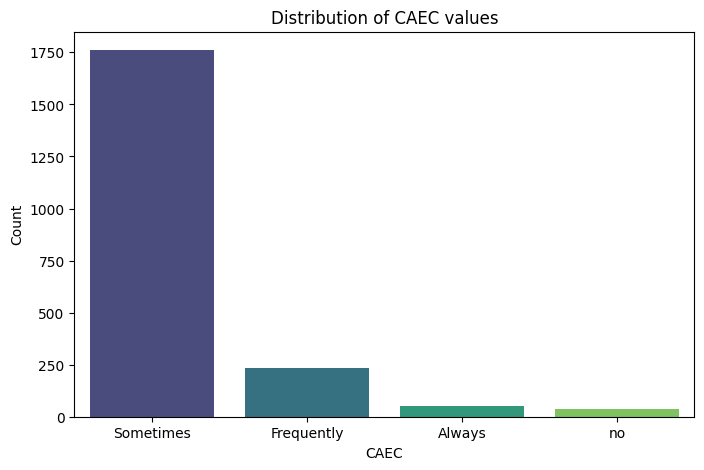

In [116]:
# Distribution of CAEC values
plt.figure(figsize=(8, 5))
sns.countplot(data=data, x='CAEC', palette='viridis')
plt.title('Distribution of CAEC values')
plt.xlabel('CAEC')
plt.ylabel('Count')
plt.show()


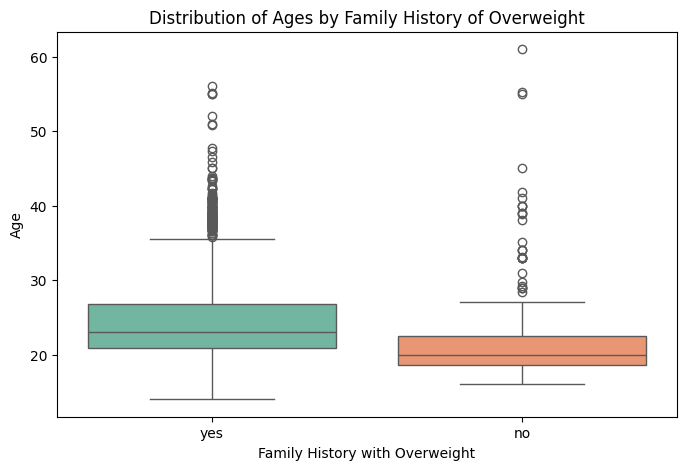

In [117]:
# Average Ages with Family History with Overweight
plt.figure(figsize=(8, 5))
sns.boxplot(data=data, x='family_history_with_overweight', y='Age', palette='Set2')
plt.title('Distribution of Ages by Family History of Overweight')
plt.xlabel('Family History with Overweight')
plt.ylabel('Age')
plt.show()

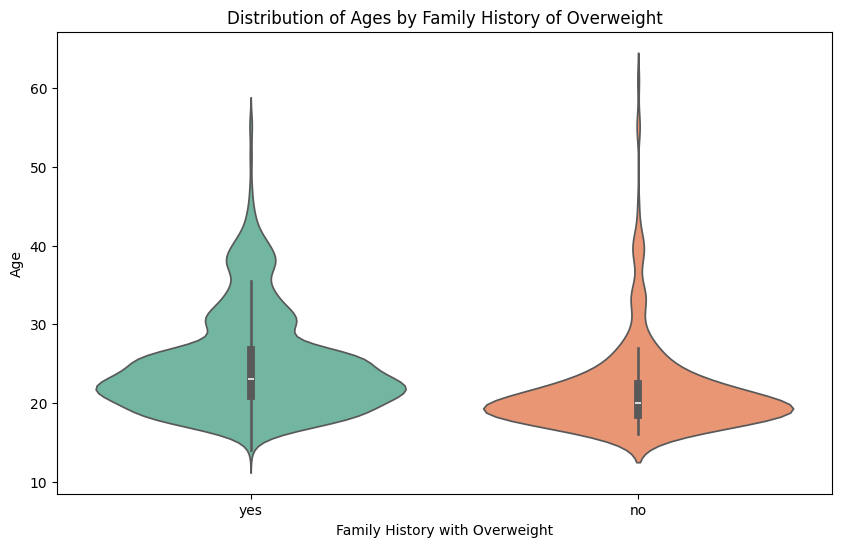

In [118]:
# Create a violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(data=data, x='family_history_with_overweight', y='Age', palette='Set2')
plt.title('Distribution of Ages by Family History of Overweight')
plt.xlabel('Family History with Overweight')
plt.ylabel('Age')
plt.show()

In [119]:
# Calculate the correlation matrix
# Select only numeric columns
numeric_df = data.select_dtypes(include=['number'])

# Calculate correlation matrix
correlation_matrix = numeric_df.corr()


# Print the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
             Age    Height    Weight      FCVC       NCP      CH2O       FAF  \
Age     1.000000 -0.031748  0.198160  0.013572 -0.055823 -0.044058 -0.148202   
Height -0.031748  1.000000  0.457468 -0.040363  0.227806  0.220487  0.293584   
Weight  0.198160  0.457468  1.000000  0.216574  0.092149  0.203823 -0.056490   
FCVC    0.013572 -0.040363  0.216574  1.000000  0.034885  0.081332  0.022003   
NCP    -0.055823  0.227806  0.092149  0.034885  1.000000  0.075335  0.127816   
CH2O   -0.044058  0.220487  0.203823  0.081332  0.075335  1.000000  0.165310   
FAF    -0.148202  0.293584 -0.056490  0.022003  0.127816  0.165310  1.000000   
TUE    -0.302927  0.041808 -0.079351 -0.104128  0.015693  0.020704  0.058716   

             TUE  
Age    -0.302927  
Height  0.041808  
Weight -0.079351  
FCVC   -0.104128  
NCP     0.015693  
CH2O    0.020704  
FAF     0.058716  
TUE     1.000000  


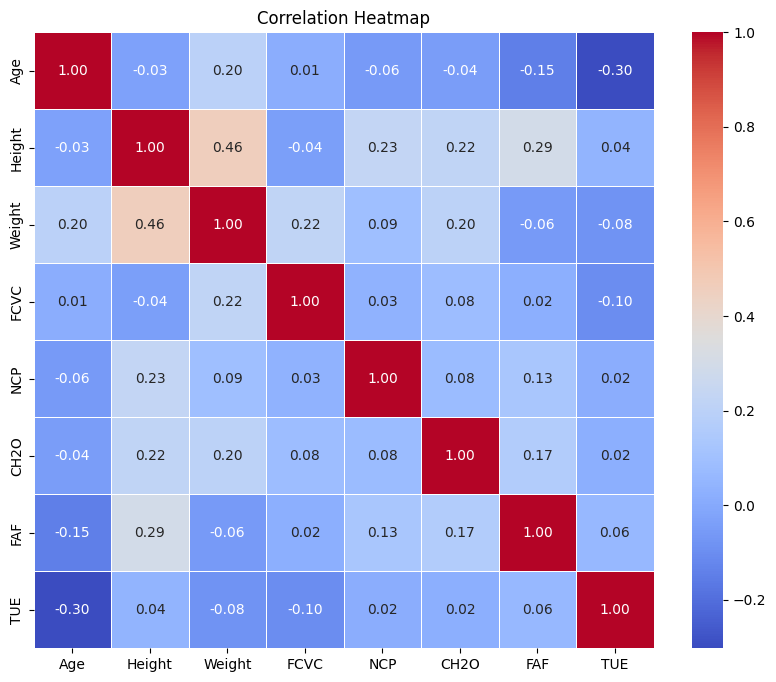

In [120]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'correlation_matrix' is your calculated correlation matrix
# Replace 'correlation_matrix' with the name of your correlation matrix if different

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

## **Encoding of Categorical Variables**

In [128]:
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

In [121]:
# List of categorical columns
#categorical_cols = X.select_dtypes(include=['object']).columns.tolist()

# List of numeric columns
numeric_cols = data.select_dtypes(include=['number']).columns.tolist()

In [122]:
# Ordinal encoding for ordinal categorical variables
ordinal_mapping = {
    'CALC':{ 'no':1 ,'Sometimes':2 , 'Frequently':3, 'Always':4 },
    'CAEC':{ 'no':1 ,'Sometimes':2 , 'Frequently':3, 'Always':4 }


}
for column, mapping in ordinal_mapping.items():
    data[column] = data[column].map(mapping)

In [123]:
data.head(10)

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21.0,Female,1.62,64.0,1,no,2.0,3.0,no,no,2.0,yes,0.0,1.0,2,Public_Transportation,Normal_Weight
1,21.0,Female,1.52,56.0,2,no,3.0,3.0,yes,yes,3.0,yes,3.0,0.0,2,Public_Transportation,Normal_Weight
2,23.0,Male,1.80,77.0,3,no,2.0,3.0,no,no,2.0,yes,2.0,1.0,2,Public_Transportation,Normal_Weight
3,27.0,Male,1.80,87.0,3,no,3.0,3.0,no,no,2.0,no,2.0,0.0,2,Walking,Overweight_Level_I
4,22.0,Male,1.78,89.8,2,no,2.0,1.0,no,no,2.0,no,0.0,0.0,2,Public_Transportation,Overweight_Level_II
5,29.0,Male,1.62,53.0,2,yes,2.0,3.0,no,no,2.0,no,0.0,0.0,2,Automobile,Normal_Weight
6,23.0,Female,1.50,55.0,2,yes,3.0,3.0,no,no,2.0,yes,1.0,0.0,2,Motorbike,Normal_Weight
7,22.0,Male,1.64,53.0,2,no,2.0,3.0,no,no,2.0,no,3.0,0.0,2,Public_Transportation,Normal_Weight
8,24.0,Male,1.78,64.0,3,yes,3.0,3.0,no,no,2.0,yes,1.0,1.0,2,Public_Transportation,Normal_Weight
9,22.0,Male,1.72,68.0,1,yes,2.0,3.0,no,no,2.0,yes,1.0,1.0,2,Public_Transportation,Normal_Weight


In [124]:
from sklearn.preprocessing import LabelEncoder

# Select categorical columns
categorical_columns = ['Gender', 'FAVC', 'SCC', 'SMOKE', 'family_history_with_overweight', 'MTRANS', 'NObeyesdad']

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply LabelEncoder to each categorical column
for col in categorical_columns:
    data[col] = label_encoder.fit_transform(data[col])

# Display the updated dataset
data.head(10)

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21.0,0,1.62,64.0,1,0,2.0,3.0,0,0,2.0,1,0.0,1.0,2,3,1
1,21.0,0,1.52,56.0,2,0,3.0,3.0,1,1,3.0,1,3.0,0.0,2,3,1
2,23.0,1,1.80,77.0,3,0,2.0,3.0,0,0,2.0,1,2.0,1.0,2,3,1
3,27.0,1,1.80,87.0,3,0,3.0,3.0,0,0,2.0,0,2.0,0.0,2,4,5
4,22.0,1,1.78,89.8,2,0,2.0,1.0,0,0,2.0,0,0.0,0.0,2,3,6
5,29.0,1,1.62,53.0,2,1,2.0,3.0,0,0,2.0,0,0.0,0.0,2,0,1
6,23.0,0,1.50,55.0,2,1,3.0,3.0,0,0,2.0,1,1.0,0.0,2,2,1
7,22.0,1,1.64,53.0,2,0,2.0,3.0,0,0,2.0,0,3.0,0.0,2,3,1
8,24.0,1,1.78,64.0,3,1,3.0,3.0,0,0,2.0,1,1.0,1.0,2,3,1
9,22.0,1,1.72,68.0,1,1,2.0,3.0,0,0,2.0,1,1.0,1.0,2,3,1


## **Standardization of Numeric Variables**

In [125]:
# Standard scaling for continuous columns
scaler = StandardScaler()
data[numeric_cols ] = scaler.fit_transform(data[numeric_cols ])

In [127]:
data.head(10)

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,-0.526613,0,-0.887408,-0.872985,1,0,-0.788364,0.390906,0,0,-0.007810,1,-1.186977,0.554211,2,3,1
1,-0.526613,0,-1.960788,-1.178508,2,0,1.082164,0.390906,1,1,1.636552,1,2.328908,-1.090505,2,3,1
2,-0.212507,1,1.044677,-0.376509,3,0,-0.788364,0.390906,0,0,-0.007810,1,1.156947,0.554211,2,3,1
3,0.415705,1,1.044677,0.005395,3,0,1.082164,0.390906,0,0,-0.007810,0,1.156947,-1.090505,2,4,5
4,-0.369560,1,0.830001,0.112328,2,0,-0.788364,-2.225418,0,0,-0.007810,0,-1.186977,-1.090505,2,3,6
5,0.729811,1,-0.887408,-1.293079,2,1,-0.788364,0.390906,0,0,-0.007810,0,-1.186977,-1.090505,2,0,1
6,-0.212507,0,-2.175464,-1.216699,2,1,1.082164,0.390906,0,0,-0.007810,1,-0.015015,-1.090505,2,2,1
7,-0.369560,1,-0.672732,-1.293079,2,0,-0.788364,0.390906,0,0,-0.007810,0,2.328908,-1.090505,2,3,1
8,-0.055454,1,0.830001,-0.872985,3,1,1.082164,0.390906,0,0,-0.007810,1,-0.015015,0.554211,2,3,1
9,-0.369560,1,0.185973,-0.720223,1,1,-0.788364,0.390906,0,0,-0.007810,1,-0.015015,0.554211,2,3,1


In [126]:
# Split dataset into train and test sets
X = data.drop(columns=['NObeyesdad'])
y = data['NObeyesdad']

In [129]:
# Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## **Classification of Diabetes Type in Indivisuals Using ML**

The 'NObeyesdad' column appears to represent the obesity level of individuals, which likely consists of discrete categories such as 'Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II', 'Obesity_Type_I', 'Obesity_Type_II', and 'Obesity_Type_III'. Thus, predicting 'NObeyesdad' is a classification problem since the goal is to classify each individual into one of these discrete categories.

Given that it's a classification problem, here are some algorithms you could consider:

1. **Logistic Regression**: Despite its name, logistic regression is a classification algorithm suitable for binary (two-class) or multi-class classification problems.

2. **Decision Trees**: Decision trees are versatile and can handle both classification and regression tasks. They're easy to interpret and can handle both numerical and categorical data.

3. **Random Forest**: Random Forest is an ensemble learning method based on decision trees. It creates multiple decision trees and combines their predictions to improve accuracy and reduce overfitting.

4. **Gradient Boosting**: Gradient Boosting algorithms like XGBoost, LightGBM, and CatBoost are powerful techniques for classification tasks. They build trees sequentially, where each new tree corrects the errors made by the previous ones.

5. **Support Vector Machines (SVM)**: SVM is effective for both linear and non-linear classification problems. It finds the optimal hyperplane that separates the classes in a high-dimensional space.


In [130]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

In [131]:
# List of classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Support Vector Machine': SVC()
}


In [133]:
# Train and evaluate classifiers
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {accuracy:.3f}")
    print(f"{name} Classification Report:")
    print(classification_report(y_test, y_pred))
    print("---------------------------------------------------------")

Logistic Regression Accuracy: 0.868
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.95      0.88        59
           1       0.88      0.62      0.73        61
           2       0.93      0.93      0.93        70
           3       0.96      1.00      0.98        64
           4       1.00      1.00      1.00        60
           5       0.73      0.75      0.74        55
           6       0.72      0.80      0.76        49

    accuracy                           0.87       418
   macro avg       0.86      0.86      0.86       418
weighted avg       0.87      0.87      0.87       418

---------------------------------------------------------
Decision Tree Accuracy: 0.907
Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.97      0.91        59
           1       0.83      0.66      0.73        61
           2       0.94      0.93   


Based on the accuracy scores provided, the Random Forest algorithm performed the best with an accuracy of 0.964. Let's now provide its classification report and confusion matrix:

In [135]:
from sklearn.metrics import confusion_matrix

In [136]:
# Print classification report
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred))

# Calculate and print confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.86      0.89        59
           1       0.80      0.72      0.76        61
           2       0.96      0.96      0.96        70
           3       1.00      0.98      0.99        64
           4       1.00      1.00      1.00        60
           5       0.74      0.82      0.78        55
           6       0.85      0.92      0.88        49

    accuracy                           0.90       418
   macro avg       0.89      0.89      0.89       418
weighted avg       0.90      0.90      0.90       418

Confusion Matrix:
[[51  8  0  0  0  0  0]
 [ 5 44  0  0  0 11  1]
 [ 0  0 67  0  0  2  1]
 [ 0  0  1 63  0  0  0]
 [ 0  0  0  0 60  0  0]
 [ 0  3  1  0  0 45  6]
 [ 0  0  1  0  0  3 45]]


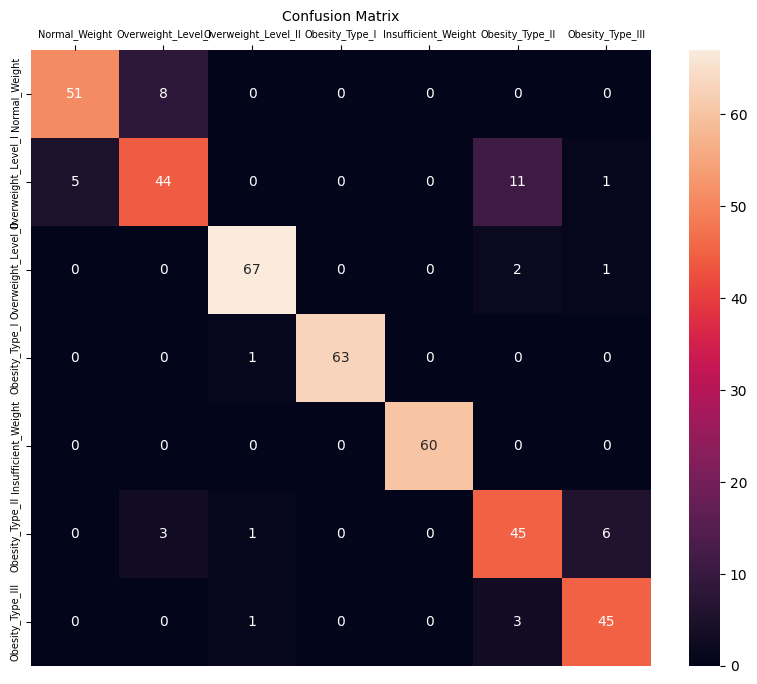

In [148]:
fig, ax = plt.subplots(figsize=(10, 8))
#plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, ax = ax, fmt = 'g');
ax.set_title('Confusion Matrix', fontsize=10)

ax.xaxis.set_ticklabels(['Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II',
       'Obesity_Type_I', 'Insufficient_Weight', 'Obesity_Type_II',
       'Obesity_Type_III'], fontsize = 7)
ax.xaxis.tick_top()

ax.yaxis.set_ticklabels(['Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II',
       'Obesity_Type_I', 'Insufficient_Weight', 'Obesity_Type_II',
       'Obesity_Type_III'], fontsize = 7)
plt.show()